# PCA on Train Set

In [17]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from Create_Mappings_and_Matrices import create_mappings_and_matrices

## Create Mappings and Matrices

In [18]:
y, class_mapping, feature_matrices, _, feature_matrix_labels = create_mappings_and_matrices()

all features train
           Class                             harmonized_filename  test_80_20  \
0          Sedan         Sedan_train_orig_test_01516_resized.jpg           0   
1            SUV          SUV_train_orig_train_00294_resized.jpg           0   
2    Convertible  Convertible_train_orig_train_04236_resized.jpg           0   
3         Pickup       Pickup_train_orig_train_03906_resized.jpg           0   
4            SUV           SUV_train_orig_test_01344_resized.jpg           0   
..           ...                                             ...         ...   
407  Convertible  Convertible_train_orig_train_04167_resized.jpg           0   
408          SUV           SUV_train_orig_test_03768_resized.jpg           0   
409          SUV          SUV_train_orig_train_06972_resized.jpg           0   
410        Sedan         Sedan_train_orig_test_07188_resized.jpg           0   
411        Sedan         Sedan_train_orig_test_00137_resized.jpg           0   

     ViT_Embedding_E

## Run PCA

In [19]:
def get_PCA(X_list, n_components):
  '''
  Takes as input a list of feature matrices and returns a list of PCA objects and a list of transformed feature matrices.
  '''
  pca_list = []
  xpca_list = []
  for X in X_list:
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X)
    X_pca = pca.transform(X)
    pca_list.append(pca)
    xpca_list.append(X_pca)
  return pca_list, xpca_list

def plot_PCA(X_list, feature_labels, n_components):
  '''
  Takes as input a list of feature matrices and a list of a label for each matrix and plots the principal components of each feature matrix.
  '''
  pca_list, _ = get_PCA(X_list, n_components=n_components)
  # Creating plot of cumulative share of variance explained
  plt.figure(figsize=(15,5))
  # color code each feature type
  colorst = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
  labels = feature_labels
  for i in range(len(X_list)):
    plt.plot(np.cumsum(pca_list[i].explained_variance_ratio_), colorst[i], label=labels[i])
  plt.xticks(range(n_components), labels = range(1, n_components+1))
  plt.yticks(np.linspace(0, 1, 8))
  plt.grid(visible=True)
  plt.xlabel('Number of Components')
  plt.ylabel('Share of Variance Explained')
  plt.legend(loc='lower right')
  plt.margins(x =0.02)
  plt.savefig('../../Output/PCA and tSNE/PCA_variance_explained.png')
  plt.show()

## Visualize Share of Variance Explained

In [20]:
# plot share of variance explained vs the number of components for PCA
x = plot_PCA(X_list=feature_matrices, feature_labels=feature_matrix_labels, n_components=None)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\ijyli\anaconda3\envs\computervision\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ijyli\AppData\Local\Temp\ipykernel_18260\108080076.py", line 2, in <module>
    x = plot_PCA(X_list=feature_matrices, feature_labels=feature_matrix_labels, n_components=None)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ijyli\AppData\Local\Temp\ipykernel_18260\2143224720.py", line 18, in plot_PCA
    pca_list, _ = get_PCA(X_list, n_components=n_components)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ijyli\AppData\Local\Temp\ipykernel_18260\2143224720.py", line 8, in get_PCA
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c

## Discriminability of Features

In [ ]:
# dimensionality reduction
pca_transformed_items = get_PCA(X_list=feature_matrices, n_components=2)[-1] # second item to get transformed features

# Check shapes
print('pca transformed items length and first element shape')
print(len(pca_transformed_items))
print(pca_transformed_items[0].shape)

pca transformed items length and first element shape
5
(6596, 2)
tsne transformed items length and first element shape
5
(6596, 2)
tsne transformed items no rescaling length and first element shape
5
(6596, 2)


In [ ]:
def plot_classes(X, y, ax, title):
  '''
  Plot the classes in a 2D space.
  '''

  # color code each cluster (class)
  colormap = plt.cm.tab20
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(list(class_mapping.keys())))]

  # project the features into 2 dimensions
  for k in range(len(np.unique(y))):
    ax.scatter(X[y==list(class_mapping.values())[k], 0], X[y==list(class_mapping.values())[k], 1], alpha=0.5, facecolors=colorst[k], label = list(class_mapping.keys())[k])

  ax.set_title(title)
  ax.legend()

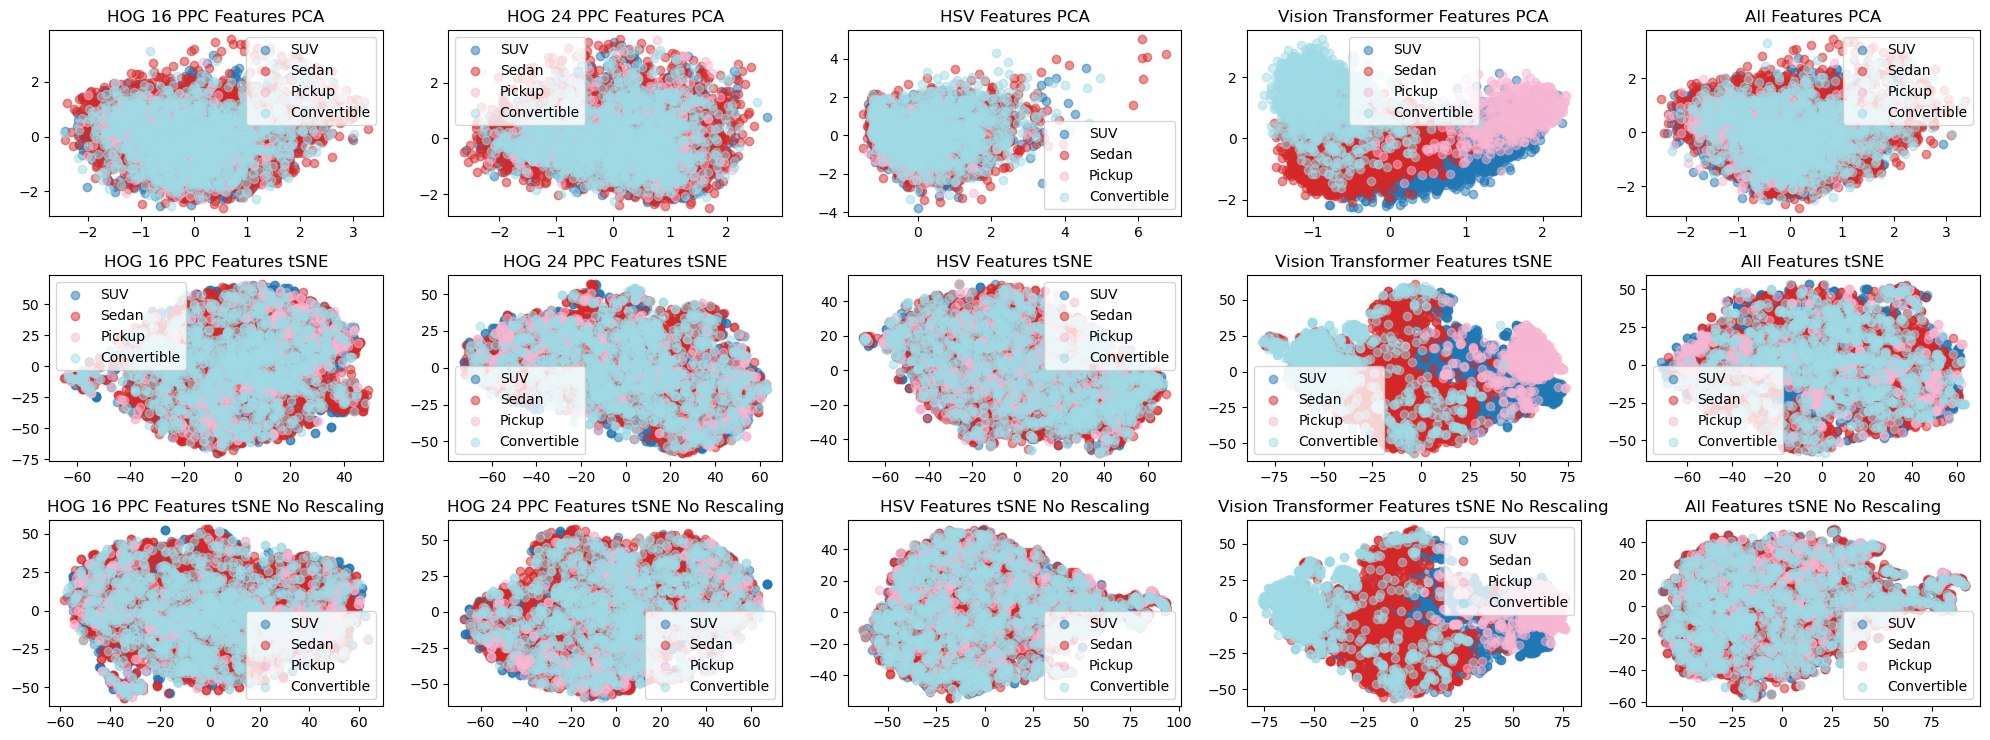

In [ ]:
# plot results
fig, ax = plt.subplots(nrows=1, ncols=len(feature_matrices), figsize=(20, 7.5))

# Iterate over feature matrices transformed and plot
for idx in range(len(feature_matrices)):
  # y is the class labels
  plot_classes(pca_transformed_items[idx], y, ax[0, idx], title=feature_matrix_labels[idx] + ' PCA')

plt.tight_layout()
plt.savefig('../../Output/PCA and tSNE/PCA_Class_Discrinimability.png')
plt.show()